In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
car=pd.read_csv('Car_cleaned.csv')
car.head()
df=car.copy()
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


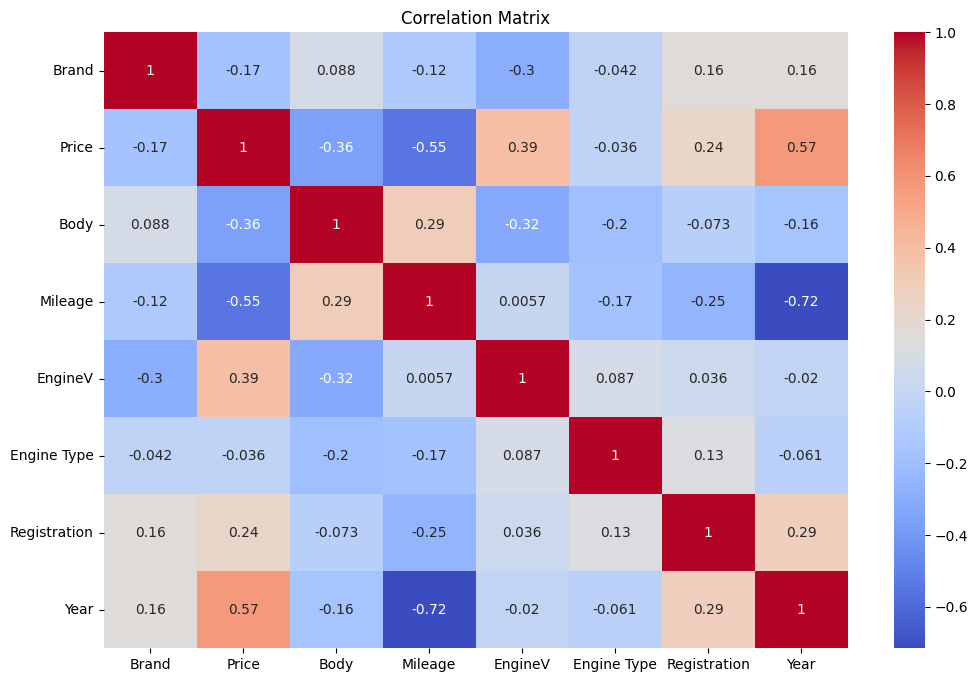

In [13]:
plt.figure(figsize=(12, 8))

from sklearn.preprocessing import LabelEncoder
car['Brand']=LabelEncoder().fit_transform(car['Brand'])
car['Body']=LabelEncoder().fit_transform(car['Body'])
car['Engine Type']=LabelEncoder().fit_transform(car['Engine Type'])
car['Registration']=LabelEncoder().fit_transform(car['Registration'])

sns.heatmap(car.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

C:\Users\suvam\AppData\Local\Temp\ipykernel_15560\965981284.py:5: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



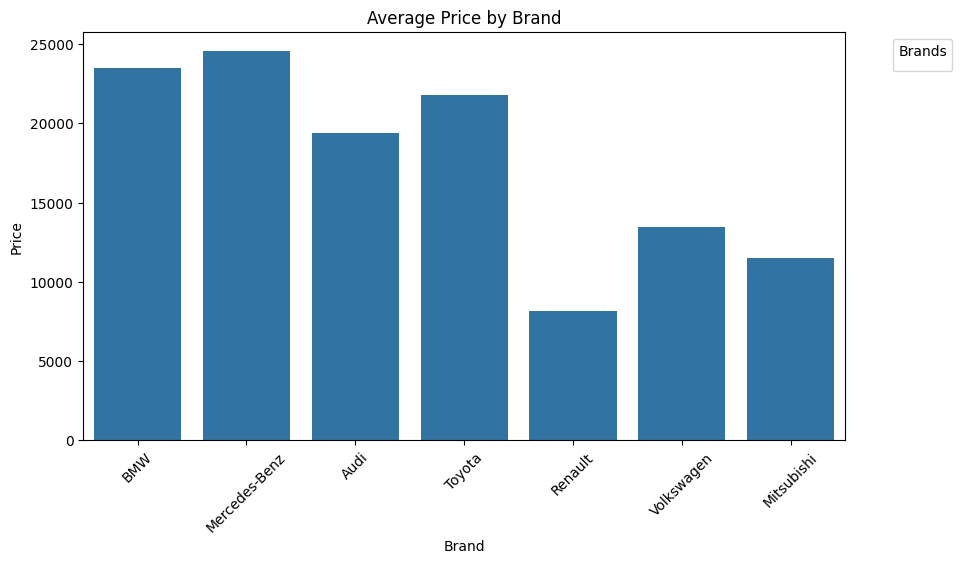

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Brand', y='Price', errorbar=None)
plt.title('Average Price by Brand')
plt.xticks(rotation=45)
plt.legend(title='Brands', loc='upper right', bbox_to_anchor=(1.15, 1))  # Add legend
plt.tight_layout(pad=2.0)  # Adjust padding
plt.show()


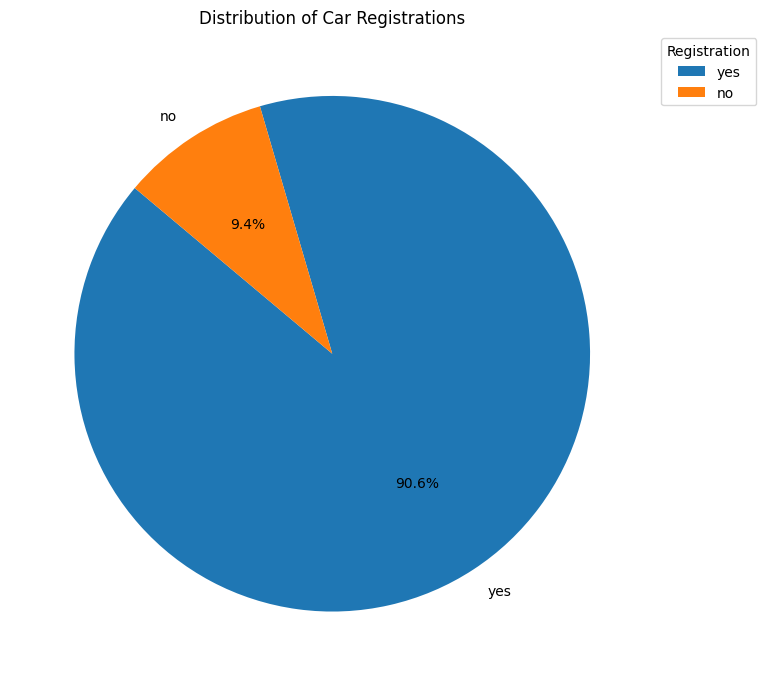

In [23]:
registration_counts = df['Registration'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(registration_counts, labels=registration_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Car Registrations')
plt.legend(title='Registration', loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))  # Add legend with padding
plt.tight_layout(pad=2.0)  # Adjust padding
plt.show()


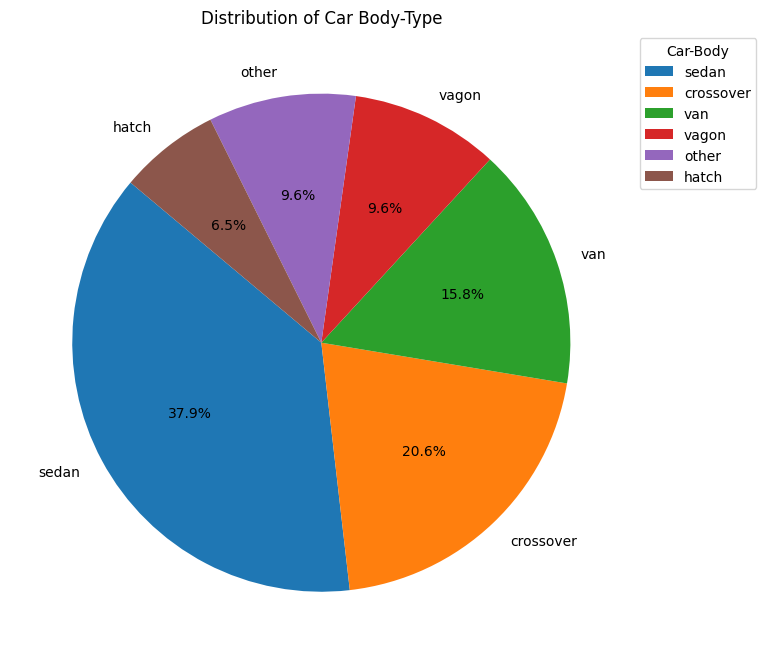

In [31]:
#Distribution Of Car-Body-Type
counts = df['Body'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Car Body-Type')
plt.legend(title='Car-Body', loc='upper left', bbox_to_anchor=(1, 0, 0.5, 1))  # Add legend with padding
plt.tight_layout(pad=2.0)  # Adjust padding
plt.show()


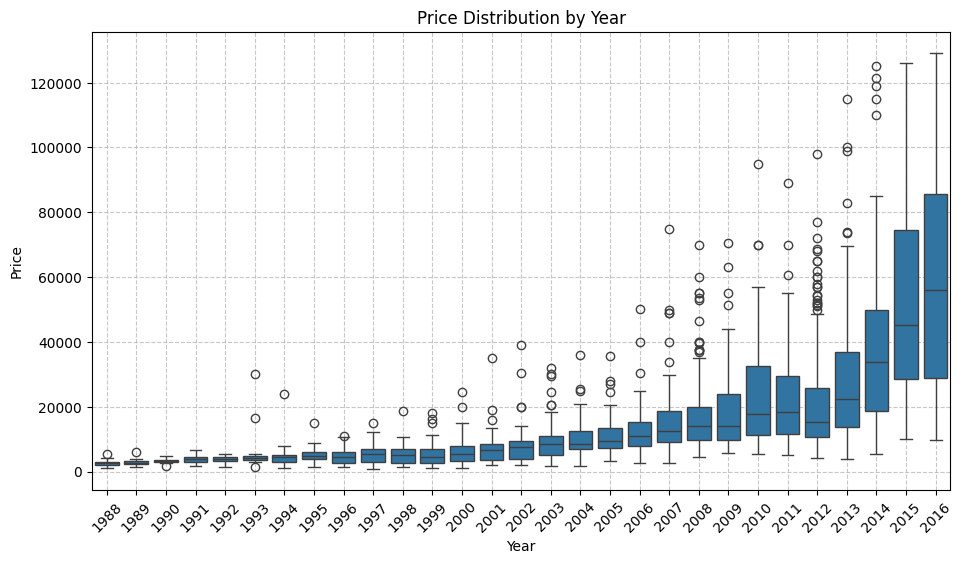

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Year', y='Price')
plt.title('Price Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines
plt.tight_layout(pad=2.0)  # Adjust padding
plt.show()
